In [27]:
"""
    @organization: Fermilab
    @author: Daniel Zurawski
    @author: Keshav Kapoor
    
    Created on Fri June 16 10:43:05 2017
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt








# from keras.models import Sequential
# from keras.layers import Dense, Activation
# from keras.callbacks import EarlyStopping, ModelCheckpoint
#     simple = Sequential()
#     simple.add(Dense(32, input_shape= (1, train_data[0].shape[0]), activation='relu'))
#     simple.add(Dense(train_target.size, kernel_initializer='uniform'))
#     simple.add(Activation('softmax'))
#     simple.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#      
#     simple.summary()
#      
#     hist = simple.fit( [train_data],
#                       [train_target],
#                       epochs=10,
#                       batch_size=5,
#                       verbose=1,
#                       validation_split=0.2,
#                       callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min'),
#                                 ModelCheckpoint(filepath='simple.h5', verbose=0)]
#                       )
#     show_losses([("cat x entropy", hist)])



In [28]:
def show_losses( histories ):
    plt.figure(figsize=(10,10))
    #plt.ylim(bottom=0)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Error by Epoch')
    colors=[]
    do_acc=False
    for label,loss in histories:
        color = tuple(np.random.random(3))
        colors.append(color)
        l = label
        vl= label+" validation"
        if 'acc' in loss.history:
            l+=' (acc %2.4f)'% (loss.history['acc'][-1])
            do_acc = True
        if 'val_acc' in loss.history:
            vl+=' (acc %2.4f)'% (loss.history['val_acc'][-1])
            do_acc = True
        plt.plot(loss.history['loss'], label=l, color=color)
        if 'val_loss' in loss.history:
            plt.plot(loss.history['val_loss'], lw=2, ls='dashed', label=vl, color=color)


    plt.legend()
    plt.yscale('log')
    plt.show()
    if not do_acc: return
    plt.figure(figsize=(10,10))
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    for i,(label,loss) in enumerate(histories):
        color = colors[i]
        if 'acc' in loss.history:
            plt.plot(loss.history['acc'], lw=2, label=label+" accuracy", color=color)
        if 'val_acc' in loss.history:
            plt.plot(loss.history['val_acc'], lw=2, ls='dashed', label=label+" validation accuracy", color=color)
    plt.legend(loc='lower right')
    plt.show()

In [81]:
def get_input_data(dataframe):
    """ Retrieve the input data in the correct format from 'dataframe'.
        @param  dataframe :: pd.DataFrame
                    A data frame with headers: (id, z, phi, eta, val, r, zl).
        @return np.array 2-D
                    A matrix with columns of data: (r, phi, z)
                    
    """
    return dataframe[["r", "phi", "z"]].values

In [82]:
def get_output_data(dataframe):
    """ Retrieve the output data in the correct format form 'dataframe'.
        @param  dataframe :: pd.DataFrame
                    A data frame with headers: (id, z, phi, eta, val, r, zl).
        @return np.array 2-D
                    A matrix where a given column at index i is the probability
                    vector of which track the particle at index i belongs to.
    """
    IDs     = dataframe[["id"]].values[:,0] # The track id's for each hit.
    uniques = np.unique(IDs) # The unique track id's.
    matrix  = np.zeros((IDs.size, uniques.size)) # The probability matrix.

    # Create a way to map track id number to an index in the probability matrix.
    ID2row = dict() 
    for col, ID in enumerate(uniques):
        ID2row[ID] = col
     
    # Populate the probability matrix with 100% certainty values.
    for col, ID in enumerate(IDs):
        matrix[col, ID2row[ID]] = 1

    return matrix


In [83]:
filename  = ('file_o_stuff3.csv')
dataframe = pd.read_csv(filename)
train_data   = [get_input_data (dataframe)]
train_target = [get_output_data(dataframe)]
print(train_data[0])
print(train_target[0])
   
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
     
simple = Sequential()
simple.add(Dense(32, input_dim=3, activation='relu'))
simple.add(Dense(9, kernel_initializer='uniform'))
simple.add(Activation('softmax'))
simple.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

simple.summary()
       
   

[[  4.00000000e+01   2.00082572e+00   1.87120317e+01]
 [  4.00000000e+01   3.67487425e+00  -3.60694053e+01]
 [  4.00000000e+01   3.16403018e+00  -1.19277446e+02]
 [  4.00000000e+01   1.85007444e+00  -9.86472205e+01]
 [  4.00000000e+01   7.06483299e-01  -1.47321245e+02]
 [  4.00000000e+01   4.46969848e-01   3.02068300e+02]
 [  4.00000000e+01   3.10193417e+00   7.26220959e+01]
 [  7.00000000e+01   2.00082572e+00   1.87120317e+01]
 [  7.00000000e+01   3.67487425e+00  -3.60694053e+01]
 [  7.00000000e+01   3.16403018e+00  -1.19277446e+02]
 [  7.00000000e+01   4.46969848e-01   3.02068300e+02]
 [  7.00000000e+01   3.10193417e+00   7.26220959e+01]
 [  1.00000000e+02   2.00082572e+00   1.87120317e+01]
 [  1.00000000e+02   3.67487425e+00  -3.60694053e+01]
 [  1.00000000e+02   3.16403018e+00  -1.19277446e+02]
 [  1.00000000e+02   5.34199006e+00   2.63497157e+02]
 [  1.00000000e+02   3.20866287e+00  -4.70047981e+02]
 [  1.00000000e+02   4.46969848e-01   3.02068300e+02]
 [  1.00000000e+02   3.10193

In [84]:
 hist = simple.fit( train_data,
                       train_target,
                       epochs=10,
                       batch_size=5,
                       verbose=1,
                       validation_split=0.2)


Train on 20 samples, validate on 5 samples
Epoch 1/10
20/20 [==============================] - 8s - loss: 7.3707 - acc: 0.2500 - val_loss: 10.1297 - val_acc: 0.2000
Epoch 2/10
20/20 [==============================] - 0s - loss: 8.9279 - acc: 0.3000 - val_loss: 9.7377 - val_acc: 0.4000
Epoch 3/10
20/20 [==============================] - 0s - loss: 7.3574 - acc: 0.5000 - val_loss: 10.2732 - val_acc: 0.0000e+00
Epoch 4/10
20/20 [==============================] - 0s - loss: 7.2963 - acc: 0.5500 - val_loss: 9.7572 - val_acc: 0.4000
Epoch 5/10
20/20 [==============================] - 0s - loss: 7.2881 - acc: 0.5500 - val_loss: 10.3261 - val_acc: 0.2000
Epoch 6/10
20/20 [==============================] - 0s - loss: 7.2912 - acc: 0.5500 - val_loss: 10.3271 - val_acc: 0.2000
Epoch 7/10
20/20 [==============================] - 0s - loss: 7.2910 - acc: 0.5500 - val_loss: 10.3911 - val_acc: 0.2000
Epoch 8/10
20/20 [==============================] - 0s - loss: 7.2967 - acc: 0.5500 - val_loss: 9.671

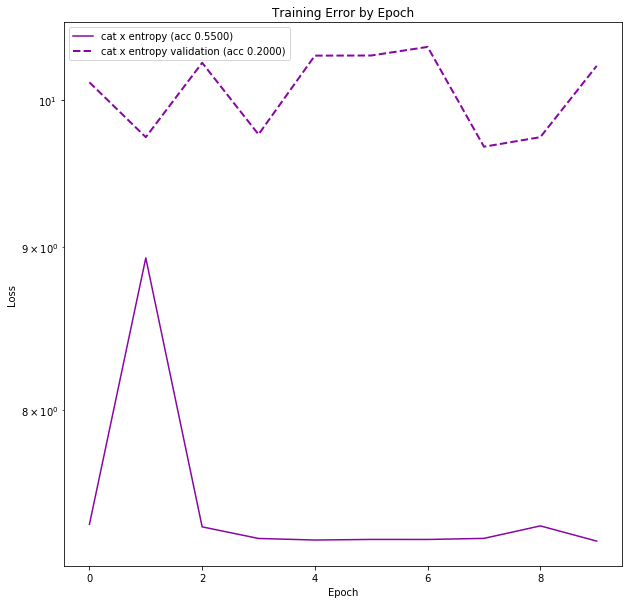

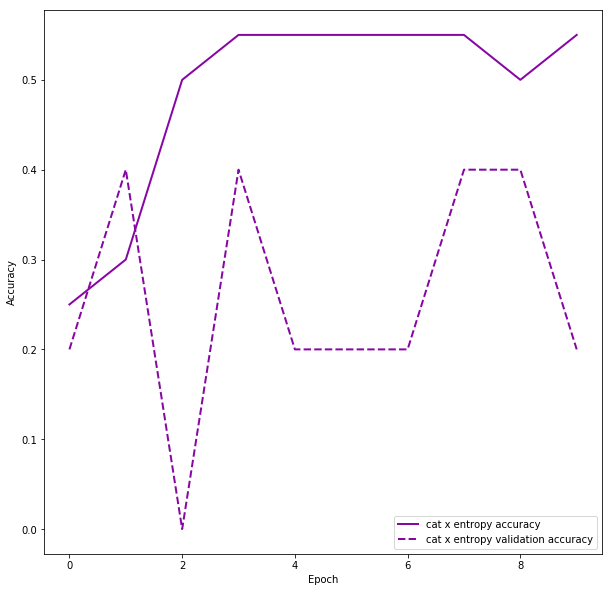

In [85]:
show_losses([("cat x entropy", hist)])